# Homework 2 Solution

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Problem 1

In [2]:
np.random.seed(1)

### 1.1

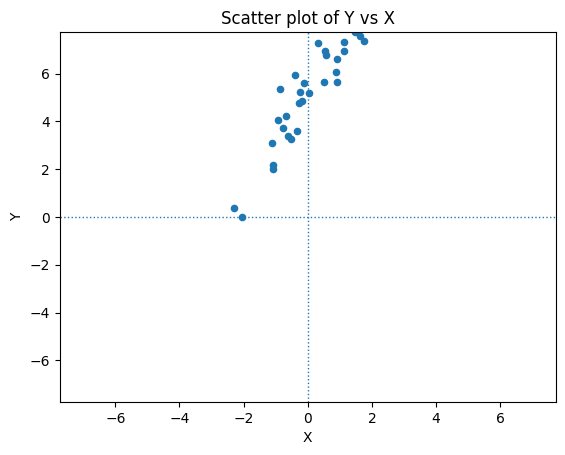

In [3]:
n = 30
# normal distribution
X = np.random.normal(loc=0, scale=1, size=n)
eps = np.random.normal(loc=0, scale=1, size=n)
Y = 5 + 2 * X + eps
data = pd.DataFrame({'X': X, 'Y': Y})
ax = data.plot.scatter(x='X', y='Y', title='Scatter plot of Y vs X')

ax.axhline(0, linestyle=':', linewidth=1)
ax.axvline(0, linestyle=':', linewidth=1)

lim = max(abs(data['X']).max(), abs(data['Y']).max())
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

ax.figure.savefig("./figures/problem1_scatter.png", dpi=300)

### 1.2

In [4]:
model = sm.OLS(data['Y'], sm.add_constant(data['X'])).fit()
print(model.summary().as_latex())
# model.summary()

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        Y         & \textbf{  R-squared:         } &     0.840   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.834   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     146.7   \\
\textbf{Date:}             & Sat, 20 Dec 2025 & \textbf{  Prob (F-statistic):} &  1.20e-12   \\
\textbf{Time:}             &     14:16:54     & \textbf{  Log-Likelihood:    } &   -36.484   \\
\textbf{No. Observations:} &          30      & \textbf{  AIC:               } &     76.97   \\
\textbf{Df Residuals:}     &          28      & \textbf{  BIC:               } &     79.77   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textb

### 1.4

In [5]:
data_mod = data.copy()
data_mod.iloc[-1] = (4, -5)
data_mod.tail()

,X,Y
25,-0.683728,4.219167
26,-0.122890,5.593203
27,-0.935769,4.059563
28,-0.267888,4.749811
29,4.000000,-5.000000


In [6]:
model2 = sm.OLS(data_mod['Y'], sm.add_constant(data_mod['X'])).fit()
print(model2.summary().as_latex())
# model2.summary()

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        Y         & \textbf{  R-squared:         } &     0.027   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &    -0.008   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &    0.7723   \\
\textbf{Date:}             & Sat, 20 Dec 2025 & \textbf{  Prob (F-statistic):} &    0.387    \\
\textbf{Time:}             &     14:16:55     & \textbf{  Log-Likelihood:    } &   -71.713   \\
\textbf{No. Observations:} &          30      & \textbf{  AIC:               } &     147.4   \\
\textbf{Df Residuals:}     &          28      & \textbf{  BIC:               } &     150.2   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textb

### 1.6

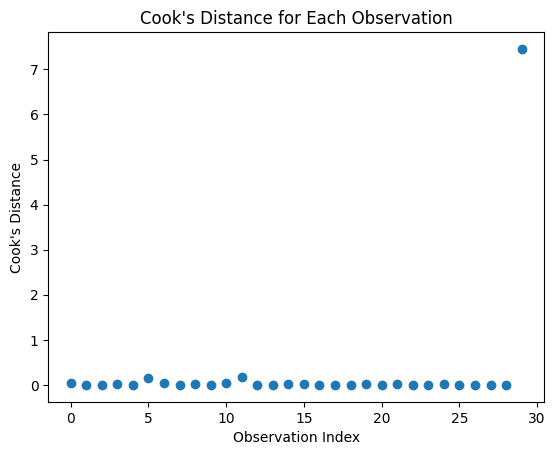

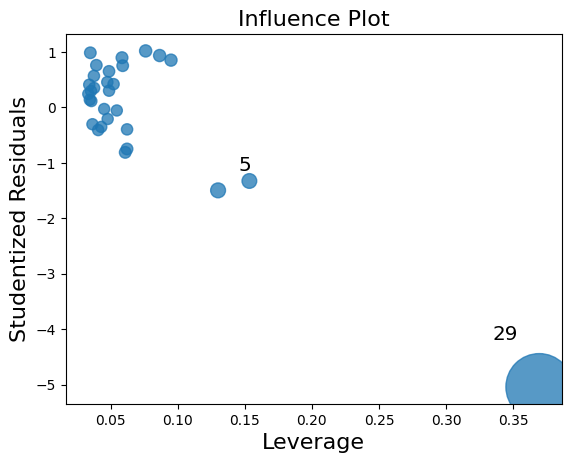

In [7]:
influence = model2.get_influence()
cooks_d = pd.Series(influence.cooks_distance[0])

ax = cooks_d.plot(
    title="Cook's Distance for Each Observation", 
    marker='o', linestyle='None',
    xlabel='Observation Index', 
    ylabel="Cook's Distance"
)
ax.figure.savefig("./figures/problem1_cooks_distance.png", dpi=300)
plt.show()

ax = influence.plot_influence()
ax.figure.savefig("./figures/problem1_influence_plot.png", dpi=300)
plt.show()

### 1.7

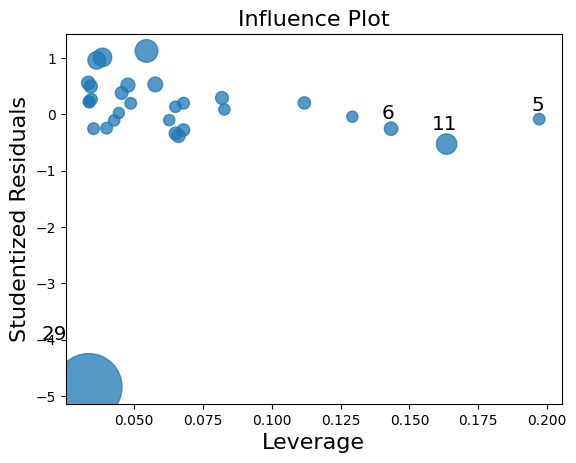

In [8]:
data_mod2 = data.copy()
data_mod2.iloc[-1] = (0, -5)
model3 = sm.OLS(data_mod2['Y'], sm.add_constant(data_mod2['X'])).fit()
# print(model3.summary().as_latex())
# model3.summary()

influence3 = model3.get_influence()
ax = influence3.plot_influence()
# ax.figure.savefig("./figures/problem1_influence_plot_2.png", dpi=300)
plt.show()

## Problem 2

### 2.1

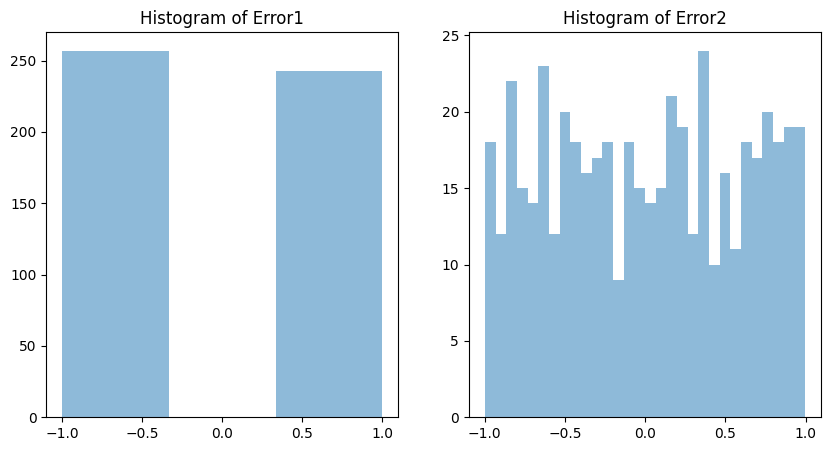

In [9]:
n=500
x = np.random.rand(n)
eps1 = 2 * np.random.binomial(1, 0.5, n) - 1
eps2 = 2 * np.random.rand(n) - 1

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(eps1, bins=3, alpha=0.5)
ax[0].set_title('Histogram of Error1')
ax[1].hist(eps2, bins=30, alpha=0.5)
ax[1].set_title('Histogram of Error2')
fig.savefig("./figures/problem2_error_histograms.png", dpi=300)

### 2.2

In [10]:
res_beta = {}
x= np.random.rand(1000)
for n in [10, 100, 1000]:
    x_temp = x[:n]
    temp = {'beta1': [], 'beta2': []}
    for i in range(1000):
        eps1 = 2 * np.random.binomial(1, 0.5, n) - 1
        eps2 = 2 * np.random.rand(n) - 1

        y1 = 2 * x_temp + eps1
        y2 = 2 * x_temp + eps2
        
        beta1 = sm.OLS(y1, x_temp).fit().params[-1]
        beta2 = sm.OLS(y2, x_temp).fit().params[-1]
        temp['beta1'].append(beta1)
        temp['beta2'].append(beta2)
    res_beta[n] = pd.DataFrame(temp)

### 2.3

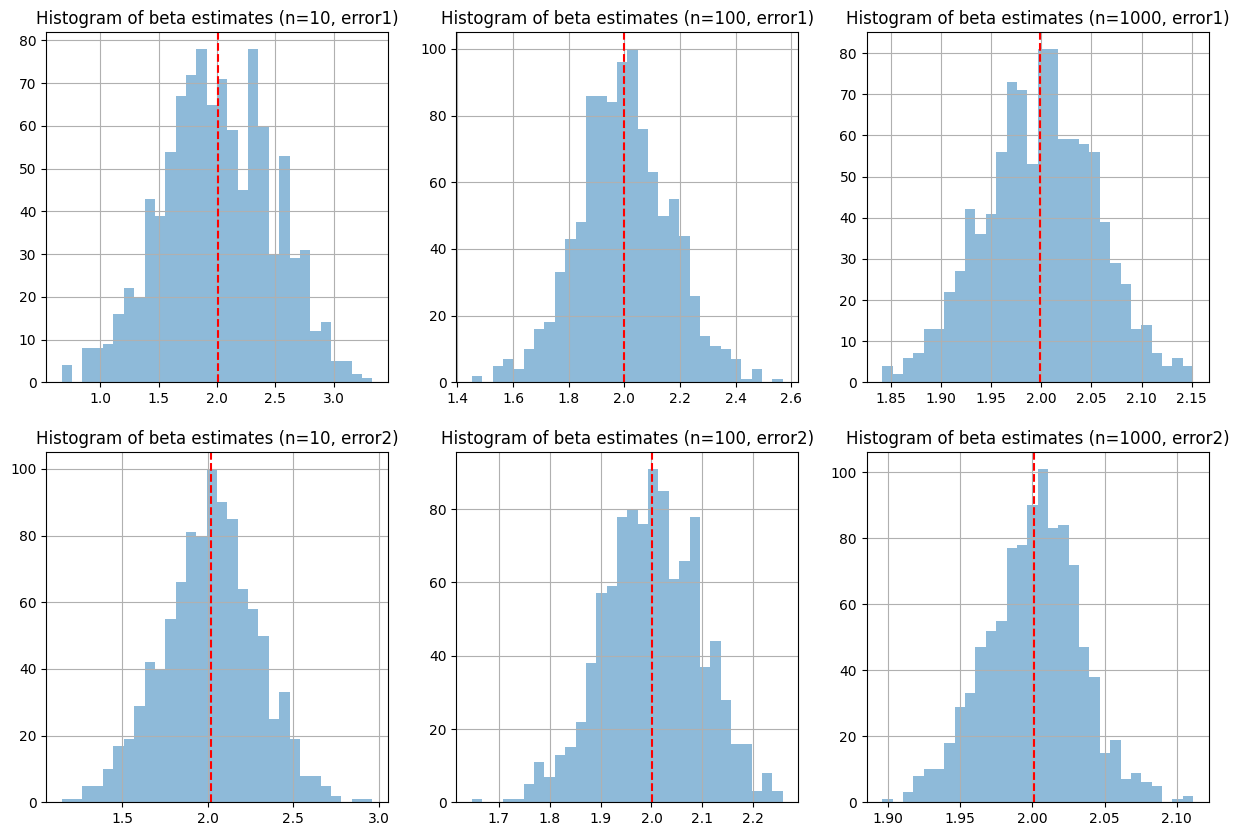

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, n in enumerate(res_beta.keys()):
    m1, m2 = res_beta[n].mean()
    res_beta[n]['beta1'].hist(bins=30, alpha=0.5, ax=ax[0, i])
    ax[0, i].set_title(f'Histogram of beta estimates (n={n}, error1)')
    ax[0, i].axvline(m1, linestyle='--', color='red', label='Mean beta1')
    res_beta[n]['beta2'].hist(bins=30, alpha=0.5, ax=ax[1, i])
    ax[1, i].set_title(f'Histogram of beta estimates (n={n}, error2)')
    ax[1, i].axvline(m2, linestyle='--', color='red', label='Mean beta2')
fig.savefig("./figures/problem2_beta_histograms.png", dpi=300)

In [12]:
shapiro = {'shapiro_stat': {}, 'shapiro_p': {}}
for n in res_beta.keys():
    for i in [1,2]:
        beta = res_beta[n][f'beta{i}']
        shapiro_stat, shapiro_p = stats.shapiro(beta)
        shapiro['shapiro_stat'][f'{n}_beta{i}'] = shapiro_stat
        shapiro['shapiro_p'][f'{n}_beta{i}'] = shapiro_p
shapiro =pd.DataFrame(shapiro).T
print(shapiro.to_latex(escape = True))

\begin{tabular}{lrrrrrr}
\toprule
 & 10\_beta1 & 10\_beta2 & 100\_beta1 & 100\_beta2 & 1000\_beta1 & 1000\_beta2 \\
\midrule
shapiro\_stat & 0.996786 & 0.999031 & 0.997968 & 0.998071 & 0.998350 & 0.996899 \\
shapiro\_p & 0.040079 & 0.888677 & 0.269298 & 0.313719 & 0.460471 & 0.048327 \\
\bottomrule
\end{tabular}



## Problem 3

### 3.1

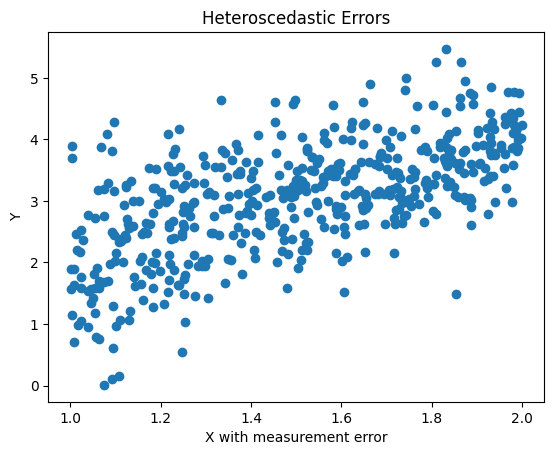

In [13]:
n = 500
x = np.random.rand(n) + 1
eps = np.random.normal(0, 1/x)
y = 2* x + eps

ax = plt.scatter(x, y)
plt.title('Heteroscedastic Errors')
plt.xlabel('X with measurement error')
plt.ylabel('Y')
ax.figure.savefig("./figures/problem3_scatter.png", dpi=300)

### 3.2

In [14]:
model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary().as_latex())
model.summary()

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.392   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.391   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     321.7   \\
\textbf{Date:}             & Sat, 20 Dec 2025 & \textbf{  Prob (F-statistic):} &  7.25e-56   \\
\textbf{Time:}             &     14:17:03     & \textbf{  Log-Likelihood:    } &   -541.07   \\
\textbf{No. Observations:} &         500      & \textbf{  AIC:               } &     1086.   \\
\textbf{Df Residuals:}     &         498      & \textbf{  BIC:               } &     1095.   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textb

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     321.7
Date:                Sat, 20 Dec 2025   Prob (F-statistic):           7.25e-56
Time:                        14:17:03   Log-Likelihood:                -541.07
No. Observations:                 500   AIC:                             1086.
Df Residuals:                     498   BIC:                             1095.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0723      0.169      0.428      0.669      -0.260       0.404
x1             1.9801      0.110     17.937      0.000       1.763       2.197
==============================================================================
Omnibus:                        1.778   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.664
Skew:                           0.045   Prob(JB):                        0.435
Kurtosis:                       3.268   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.4

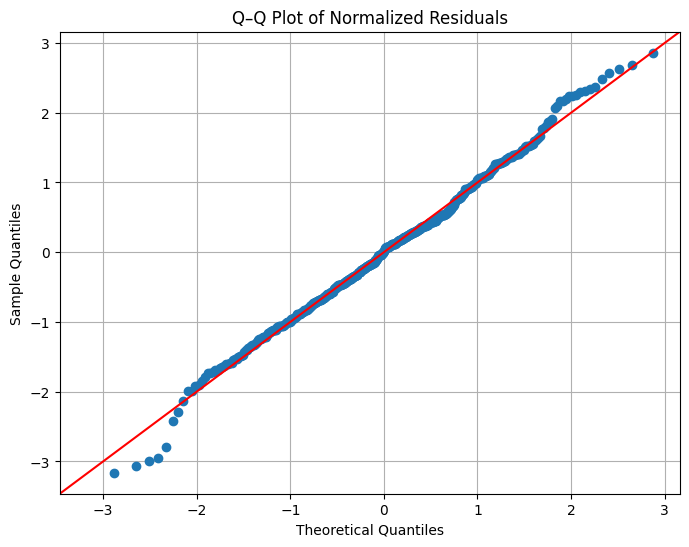

In [15]:
residuals = model.resid
normalized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(normalized_residuals, line='45', fit=True, ax=ax)
ax.set_title('Q–Q Plot of Normalized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
ax.grid(True)
fig.savefig("./figures/problem3_OLS_qq_plot.png", dpi=300)

### 3.5

In [16]:
model_wls = sm.WLS(y, sm.add_constant(x), weights = x**2).fit()
print(model_wls.summary().as_latex())
model_wls.summary()

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.378   \\
\textbf{Model:}            &       WLS        & \textbf{  Adj. R-squared:    } &     0.377   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     302.5   \\
\textbf{Date:}             & Sat, 20 Dec 2025 & \textbf{  Prob (F-statistic):} &  2.71e-53   \\
\textbf{Time:}             &     14:17:04     & \textbf{  Log-Likelihood:    } &   -528.23   \\
\textbf{No. Observations:} &         500      & \textbf{  AIC:               } &     1060.   \\
\textbf{Df Residuals:}     &         498      & \textbf{  BIC:               } &     1069.   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textb

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.378
Model:                            WLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     302.5
Date:                Sat, 20 Dec 2025   Prob (F-statistic):           2.71e-53
Time:                        14:17:04   Log-Likelihood:                -528.23
No. Observations:                 500   AIC:                             1060.
Df Residuals:                     498   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1693      0.180      0.939      0.348      -0.185       0.523
x1             1.9187      0.110     17.393      0.000       1.702       2.135
==============================================================================
Omnibus:                        2.963   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                3.055
Skew:                           0.082   Prob(JB):                        0.217
Kurtosis:                       3.346   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.6

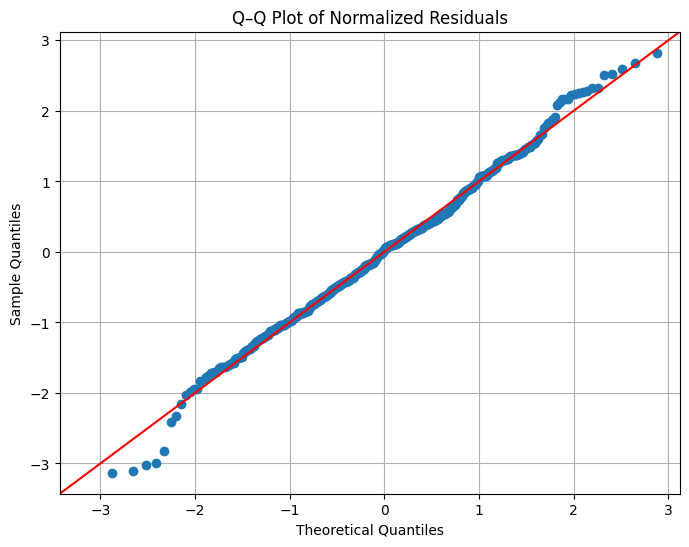

In [17]:
residuals = model_wls.resid
normalized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(normalized_residuals, line='45', fit=True, ax=ax)
ax.set_title('Q–Q Plot of Normalized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
ax.grid(True)
fig.savefig("./figures/problem3_WLS_qq_plot.png", dpi=300)